Original DataFrame Head:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  prol

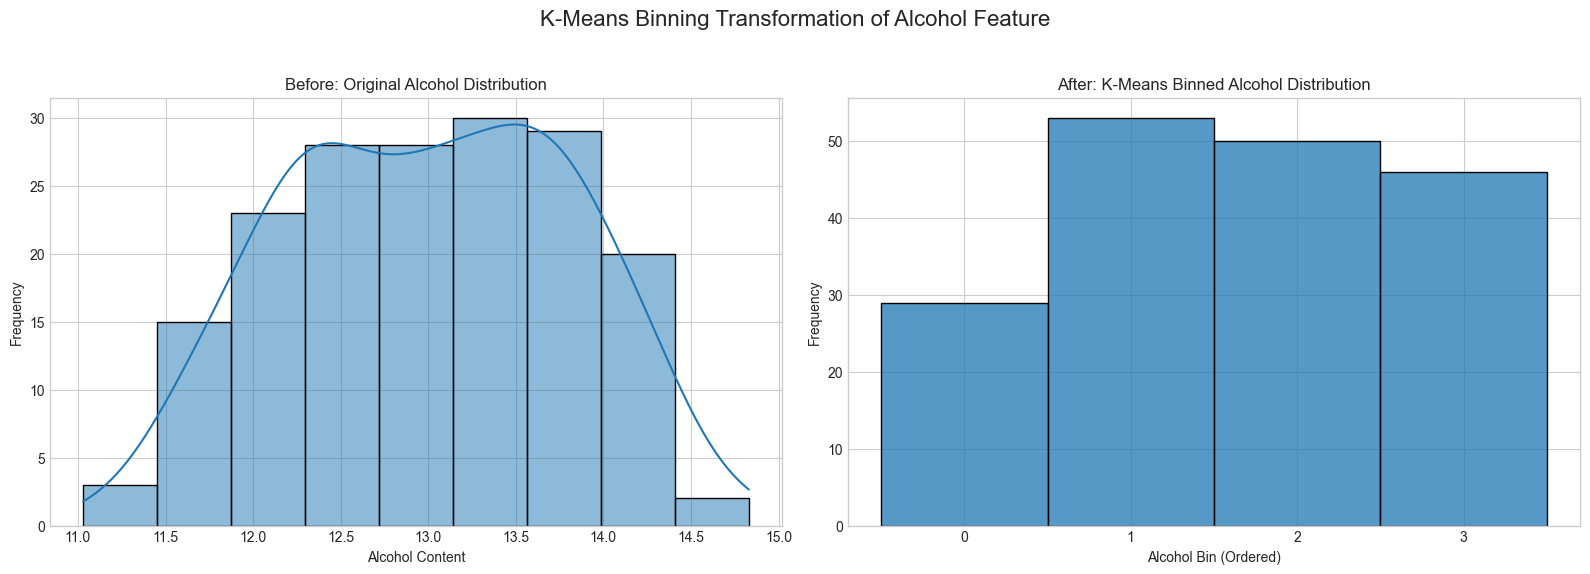


DataFrame Head with K-Means Binned Column:
   alcohol  alcohol_kmeans_bin  alcohol_kmeans_bin_ordered
0    14.23                   0                           3
1    13.20                   2                           2
2    13.16                   2                           2
3    14.37                   0                           3
4    13.24                   2                           2

Alcohol content ranges for each ordered bin:
  Bin 0: 11.03 - 12.08
  Bin 1: 12.16 - 12.88
  Bin 2: 12.93 - 13.64
  Bin 3: 13.67 - 14.83


In [1]:
# K-Means Binning is a technique used to discretize a continuous feature into a
# set of 'bins' or intervals. It uses the K-Means clustering algorithm to
# identify the optimal bin boundaries.

# When to use K-Means Binning:
# - To convert continuous features into categorical ones, which can be
#   beneficial for certain machine learning models (e.g., decision trees,
#   or for creating dummy variables).
# - To capture non-linear relationships between a feature and the target variable.
# - To reduce the impact of outliers, as they will be grouped into a bin with
#   other points.

# Data Requirements:
# - The input feature(s) must be numerical and continuous.
# - It's best suited for features where natural groupings or clusters might exist.

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns

# 1. FIND AND LOAD A RELEVANT DATASET FROM SCIKIT-LEARN
# We'll use the Wine dataset from scikit-learn, which has several continuous
# features.
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
print("Original DataFrame Head:")
print(df.head())
print("\nDataset Info:")
df.info()

# 2. SELECT A FEATURE TO WORK WITH
# We will apply K-Means Binning to the 'alcohol' feature.
feature_to_bin = 'alcohol'
data_to_bin = df[[feature_to_bin]] # Needs to be a DataFrame for KMeans

# 3. APPLY K-MEANS BINNING
# We will create 4 bins. The number of bins (k) is a hyperparameter you can tune.
n_bins = 4
kmeans = KMeans(n_clusters=n_bins, random_state=42, n_init=10)
kmeans.fit(data_to_bin)

# Get the cluster assignments for each data point. These are our new bins.
df['alcohol_kmeans_bin'] = kmeans.labels_

# The cluster centers represent the 'average' value for each bin.
# We can create a mapping from the bin label to the cluster center to understand
# the bins better.
bin_centers = kmeans.cluster_centers_.flatten()
bin_mapping = {i: bin_centers[i] for i in range(n_bins)}
print(f"\nBin Centers (average alcohol content for each bin):\n{bin_mapping}")


# To make the bins more interpretable, we can order them by their centers.
sorted_bin_centers = sorted(bin_centers)
bin_order_map = {list(bin_centers).index(center): i for i, center in enumerate(sorted_bin_centers)}
df['alcohol_kmeans_bin_ordered'] = df['alcohol_kmeans_bin'].map(bin_order_map)


# 4. SHOW THE RESULT
# Create a before-and-after visualization to show the effect of the transformation.

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before: Histogram of the original 'alcohol' feature
sns.histplot(df[feature_to_bin], kde=True, ax=axes[0])
axes[0].set_title('Before: Original Alcohol Distribution')
axes[0].set_xlabel('Alcohol Content')
axes[0].set_ylabel('Frequency')

# After: Histogram of the binned 'alcohol' feature
# We plot the distribution of the ordered bin labels.
sns.histplot(df['alcohol_kmeans_bin_ordered'], bins=n_bins, discrete=True, ax=axes[1])
axes[1].set_title('After: K-Means Binned Alcohol Distribution')
axes[1].set_xlabel('Alcohol Bin (Ordered)')
axes[1].set_ylabel('Frequency')
# Set x-ticks to be the bin numbers
axes[1].set_xticks(range(n_bins))


plt.suptitle('K-Means Binning Transformation of Alcohol Feature', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 5. PRINT THE HEAD OF THE RESULTING DATAFRAME
# The new column 'alcohol_kmeans_bin_ordered' contains the discrete bins.
print("\nDataFrame Head with K-Means Binned Column:")
print(df[[feature_to_bin, 'alcohol_kmeans_bin', 'alcohol_kmeans_bin_ordered']].head())

# We can also see the range of alcohol content that falls into each bin.
print("\nAlcohol content ranges for each ordered bin:")
for bin_num in sorted(df['alcohol_kmeans_bin_ordered'].unique()):
    min_val = df[df['alcohol_kmeans_bin_ordered'] == bin_num][feature_to_bin].min()
    max_val = df[df['alcohol_kmeans_bin_ordered'] == bin_num][feature_to_bin].max()
    print(f"  Bin {bin_num}: {min_val:.2f} - {max_val:.2f}")
